In [1]:
import tensorflow as tf
from DeepLearn.tools.models import LetNet
from tensorflow import keras
from DeepLearn.tools.loadData import DataSets

In [2]:
batch_size = 128
datasets=DataSets()
train_data, val_data, test_data = datasets.load_data("mnist",batch_size=128,classes=10)
simple = next(iter(train_data))
print(simple[0].shape, simple[1].shape)
network = LetNet()
network.build(input_shape=(None, 28, 28, 1))
network.summary()
criteom = tf.losses.CategoricalCrossentropy(from_logits=True)

optimizer = keras.optimizers.Adam(0.001)

data: train (50000, 32, 32, 3) (50000, 1) test: (10000, 32, 32, 3) (10000, 1)
(128, 32, 32, 3) (128, 10)
Model: "let_net"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  456       
_________________________________________________________________
batch_normalization (BatchNo multiple                  24        
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
re_lu (ReLU)                 multiple                  0         
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  2416      
_________________________________________________________________
batch_normalization_1 (Batch multiple                  64        
____________________

In [3]:
total_cor, total_num = 0, 0
for epochs in range(5):
    for step, (x, y) in enumerate(train_data):
        x=tf.expand_dims(x,axis=3)
        with tf.GradientTape() as tape:
            out = network(x)
            loss = criteom(y, out)

        grads = tape.gradient(loss, network.trainable_variables)
        optimizer.apply_gradients(zip(grads, network.trainable_variables))

        if step % 100 == 0:
            print(step, 'loss', loss)

    for step, (x, y) in enumerate(val_data):
        x=tf.expand_dims(x,axis=3)
        prob = network(x)
        pred = tf.argmax(prob, axis=-1)
        y = tf.argmax(y, axis=-1)
        collect = tf.reduce_sum(tf.cast(tf.equal(pred, y), dtype=tf.int32))
        total_cor += collect
        total_num += int(x.shape[0])

    acc = float(total_cor / total_num)

    print(epochs, "accuracy", acc)

0 loss tf.Tensor(0.2696244, shape=(), dtype=float32)
100 loss tf.Tensor(0.08992202, shape=(), dtype=float32)
200 loss tf.Tensor(0.16181095, shape=(), dtype=float32)
300 loss tf.Tensor(0.19432002, shape=(), dtype=float32)
0 accuracy 0.147
0 loss tf.Tensor(0.19151786, shape=(), dtype=float32)
100 loss tf.Tensor(0.20505904, shape=(), dtype=float32)
200 loss tf.Tensor(0.23176742, shape=(), dtype=float32)
300 loss tf.Tensor(0.29700026, shape=(), dtype=float32)
1 accuracy 0.1225
0 loss tf.Tensor(0.270865, shape=(), dtype=float32)
100 loss tf.Tensor(0.1776624, shape=(), dtype=float32)
200 loss tf.Tensor(0.19437039, shape=(), dtype=float32)
300 loss tf.Tensor(0.25693804, shape=(), dtype=float32)
2 accuracy 0.11563333333333334
0 loss tf.Tensor(0.1614779, shape=(), dtype=float32)
100 loss tf.Tensor(0.1843, shape=(), dtype=float32)
200 loss tf.Tensor(0.15350199, shape=(), dtype=float32)
300 loss tf.Tensor(0.18159501, shape=(), dtype=float32)
3 accuracy 0.11165
0 loss tf.Tensor(0.15069012, shape=(

#### predict

tf.Tensor(
[[1.43610173e-08 1.32881555e-08 1.53555803e-03 3.48592937e-01
  2.99212239e-12 1.17619763e-07 1.53156794e-08 8.70893579e-09
  6.49871349e-01 2.83007129e-08]], shape=(1, 10), dtype=float32)


(-0.5, 10.0)

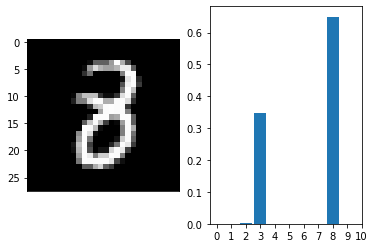

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

img = next(iter(test_data))
img=img[0][0]
plt.subplot(121),plt.imshow(img,'gray'),plt.xticks([]),plt.xticks()
img=tf.expand_dims(img,axis=-1)
img=tf.expand_dims(img,axis=0)
prob=network(img)
prob=tf.nn.softmax(prob,axis=-1)
print(prob)

# 显示概率柱状图
x_major_locator=MultipleLocator(1)
y_major_locator=MultipleLocator(0.1)
plt.subplot(122),plt.bar(np.arange(10),prob[0]),plt.xlim((0,10))
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim((-0.5,10))


In [4]:
a=tf.random.normal([128,32,32,1])
model=tf.keras.layers.Flatten()
print(model(a).shape)

(128, 1024)
